In [5]:
import os
import json
import numpy as np

experiment_dir = "../experiments/random_jsons/random_architectures_with_loss"
dir_depth      = 4

filenames = [f for f in os.listdir(experiment_dir) if os.path.isfile(os.path.join(experiment_dir, f))]
data = []

for filename in filenames:
    full_path = os.path.join(experiment_dir, filename)
    config = json.load( open( full_path) )
    if 'Results' in config:
        data_element = { 'filename': filename, **config['FTP'], **config['Results'] }
    else:
        data_element = { 'filename': filename, **config['FTP'], 'learning_curve_train': [] }
    data.append( data_element )

for e in data:
    print(e['filename'], ':')
    s1 = f'''{len(e['quantiles'])} quantiles available'''
    print( "  ", s1)
    s2 = f'''{len(e['learning_curve_train'])} training sample available'''
    print( "  ", s2)
    print( "  ", e['learning_curve_train'] )

random_Fri_Oct_15_09-02-15_2021.json :
   11 quantiles available
   6 training sample available
   [0.18315063416957855, 0.18382787704467773, 0.18107455968856812, 0.17733101546764374, 0.18173542618751526, 0.18340176343917847]
random_Fri_Oct_15_08-43-30_2021.json :
   11 quantiles available
   6 training sample available
   [0.12420003861188889, 0.12529635429382324, 0.12716566026210785, 0.12552647292613983, 0.1291455179452896, 0.1267993450164795]
random_Fri_Oct_15_08-54-46_2021.json :
   11 quantiles available
   6 training sample available
   [0.1971423178911209, 0.1974366307258606, 0.19778752326965332, 0.19783546030521393, 0.20007120072841644, 0.1948622316122055]
random_Fri_Oct_15_09-16-59_2021.json :
   11 quantiles available
   6 training sample available
   [0.17953048646450043, 0.19164927303791046, 0.18226224184036255, 0.18480460345745087, 0.1850735992193222, 0.1840946525335312]
random_Fri_Oct_15_09-16-39_2021.json :
   11 quantiles available
   6 training sample available
   [0.1

In [8]:
scatter_data = {}

for i in range(11):
    scatter_data[i] = []

for e in data:
    train_sample = e['learning_curve_train']
    for s in train_sample:
        for i in range(11):
            if s < 0.5: # Remove outliers
                scatter_data[i].append( (e['quantiles'][i], s))

# Data points for each quantile
for i in range(11):
    print( i, ':', len(scatter_data[i]) )

0 : 100
1 : 100
2 : 100
3 : 100
4 : 100
5 : 100
6 : 100
7 : 100
8 : 100
9 : 100
10 : 100


Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.6633941552240976, pvalue=5.442627874501907e-14)
Pearson : (-0.5542677479105864, 2.195784844294032e-09)
R2      : -0.5542677479105871


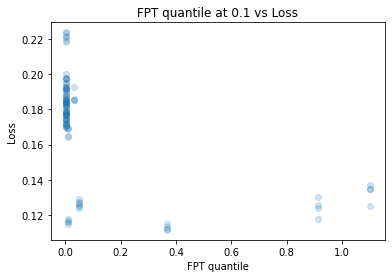

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.5947566043767992, pvalue=6.813643846189977e-11)
Pearson : (-0.5889588763996134, 1.1539887571514571e-10)
R2      : -0.5889588763996138


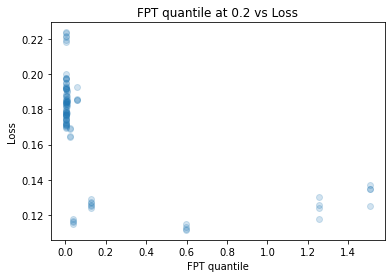

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.6802171214665094, pvalue=7.054627472061573e-15)
Pearson : (-0.6253954582000996, 3.5044125237696725e-12)
R2      : -0.6253954582001001


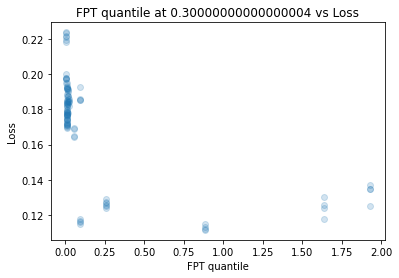

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.6874701561770313, pvalue=2.8021849280317995e-15)
Pearson : (-0.6683388481204645, 3.026641532696169e-14)
R2      : -0.6683388481204656


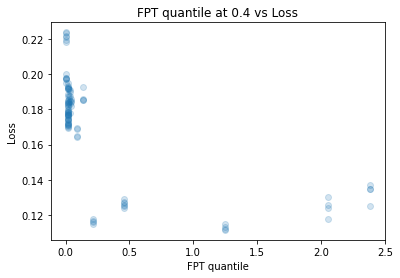

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.7309810490542985, pvalue=5.9332109912221615e-18)
Pearson : (-0.7136688540439429, 7.88155472465697e-17)
R2      : -0.7136688540439433


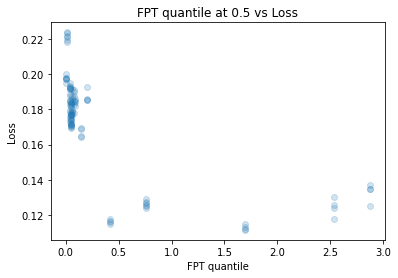

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.776727070641601, pvalue=2.170312322385334e-21)
Pearson : (-0.7634908162792221, 2.571578674457232e-20)
R2      : -0.7634908162792229


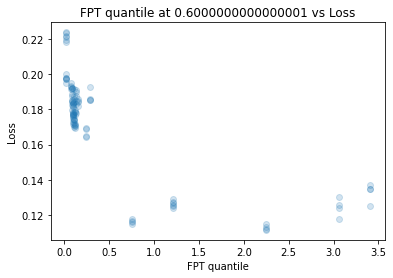

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.7850233587755319, pvalue=4.220810810513364e-22)
Pearson : (-0.8156410515325497, 5.030112862591507e-25)
R2      : -0.8156410515325506


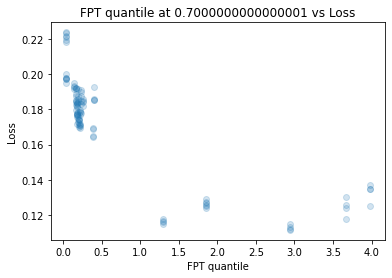

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.8161626884296561, pvalue=4.4373501322133725e-25)
Pearson : (-0.8678612831088744, 1.5549536306409331e-31)
R2      : -0.867861283108876


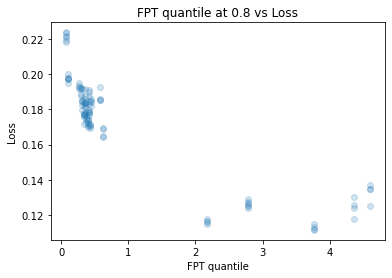

Correlation measures: 
Spearman: SpearmanrResult(correlation=-0.8711107125770201, pvalue=4.980525791769625e-32)
Pearson : (-0.9168945796670864, 7.099568865307518e-41)
R2      : -0.9168945796670879


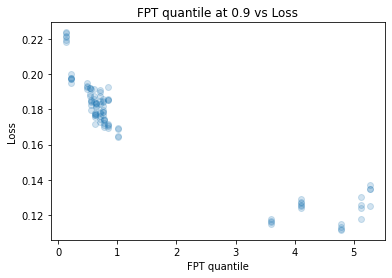

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

for i in range(1,10):
    # Bivariate analysis of quantiles and losses
    x = [x for (x,y) in scatter_data[i]]
    y = [y for (x,y) in scatter_data[i]]
    spearman = scipy.stats.spearmanr(x, y)
    pearson  = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print("Correlation measures: ")
    print("Spearman:", spearman )
    print("Pearson :", pearson  )
    print("R2      :", r_value)
    # Plot
    plt.scatter( x, y , alpha=0.2)
    plt.title(f'''FPT quantile at {i*0.1} vs Loss''')
    plt.xlabel("FPT quantile")
    plt.ylabel("Loss")
    plt.savefig(f'''FTP_quantile{i*10}.png''')
    plt.show()


In [4]:
!pip install scipy
